# Modelling - Evaluation:
<h3> In this Notebook i'll first split the dataframe which now contains the wordembedding vector representation for 
 the comment and topic columns, into Training and Test set at 70:30 </h3>

<h3> Next: We'll apply the following models "listed below" to our data and then use accuracy to measure the model with the best performance 
    <p>The chossen model will then be Tested on unseen data and  explored using other Evaluation Metrics.</p>
    <p>S/N: Elements of Grid Search are be used to tune Hyperparameter for MLP</P>
</h3>

<p>
<ul>
    <li> Support Vector Machine</li>
    <li> Logistic Regression (X) </li>
    <li> RandomForest</li>
    <li> XGBoost / LSTM Neural Network / MLP </li>
    <li> Naive Bayes (X)</li>
</ul>
</p>

<h3> Here are some evaluation metric we'll be using for the model</h3>
<p>
<ul>
    <li> F1 score</li>
    <li> Accuracy </li>
    <li> Precision</li>
    <li> Recall </li>
    <li> Confusion Matrix</li>
</ul>
</p>

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np

df=pd.read_csv("model_data_4.csv")
df

,target,a,b,c,d,e,f,0,1,2,...,90.1,91.1,92.1,93.1,94.1,95.1,96.1,97.1,98.1,99.1
0,neu,0.0,1.0,0.0,1.0,0.0,0.0,0.006560,-0.034674,0.180679,...,0.132200,0.093612,0.134560,-0.090816,-0.093931,0.006347,0.067203,-0.296446,0.236455,0.319731
1,pos,0.0,0.0,1.0,0.0,1.0,0.0,0.180729,-0.034253,-0.007357,...,0.021574,0.278756,0.060132,-0.295516,-0.123788,0.117804,-0.156616,-0.108647,0.454259,0.123385
2,pos,0.0,0.0,1.0,0.0,1.0,0.0,0.014433,-0.187421,0.032284,...,0.225268,0.101662,-0.002514,-0.092069,-0.191231,0.003927,-0.048874,-0.169493,0.404920,0.206606
3,pos,1.0,0.0,0.0,1.0,0.0,0.0,0.102713,-0.122163,0.167701,...,0.075651,0.053715,0.042065,-0.074095,-0.325612,-0.029785,0.063639,0.030749,0.490816,0.076445
4,pos,1.0,0.0,0.0,1.0,0.0,0.0,0.123185,-0.057500,0.164821,...,0.220945,0.070169,-0.045384,-0.023608,-0.403638,-0.047966,0.021852,-0.119835,0.352950,0.071742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,neg,1.0,0.0,0.0,0.0,1.0,0.0,0.045362,-0.110592,-0.060787,...,0.083572,0.117578,-0.050548,-0.240905,-0.065884,0.097666,-0.186384,-0.357412,0.373521,0.311909
3255,neg,1.0,0.0,0.0,0.0,1.0,0.0,0.135307,-0.096323,-0.107072,...,0.041132,0.226143,-0.060794,-0.271573,-0.233932,0.017458,0.101868,0.061758,0.432194,0.132932
3256,neg,1.0,0.0,0.0,0.0,0.0,1.0,-0.003029,-0.035019,-0.003800,...,0.176898,0.235542,-0.309587,-0.118536,-0.236206,0.157906,0.145540,-0.052904,0.599252,-0.017703
3257,neg,1.0,0.0,0.0,0.0,1.0,0.0,-0.018971,-0.178611,-0.049338,...,-0.021237,0.263314,-0.019418,-0.325118,-0.068818,-0.095046,0.113397,0.029055,0.335391,0.223715


In [2]:
# Syntax: droping y/target variable then use remainder with ->> df.drop(['target'], axis=1)

In [3]:
from sklearn.model_selection import train_test_split

# Split data in train test set using scikitlearn tr-t-s() funtion and  syntax below:
train, test = train_test_split(df, test_size=0.3, random_state=42)        # 30% test set split
X_train = train.drop(['target'], axis=1).values     #should remain 306 features
X_test = test.drop(['target'], axis=1).values
y_train = train['target']
y_test = test['target']

# Or Alternatively:::
# use pandas sampling funtion to Split Data into Training and test sets:
# df_copy = df.copy()
# df_train = df_copy.sample(frac=0.70, random_state=1)
# df_test = df_copy.drop(df_train.index)
# 
# print(df_train.shape)
# print(df_test.shape)

In [4]:
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(2281, 306)
(978, 306)
(2281,)
(978,)


<AxesSubplot:>

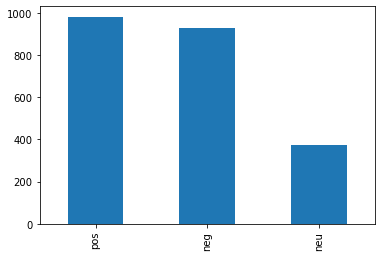

In [5]:
# observe distribution to see if labels are unbalanced and need undersampling/Oversampling techniques applied 
train['target'].value_counts().plot(kind='bar')


<AxesSubplot:>

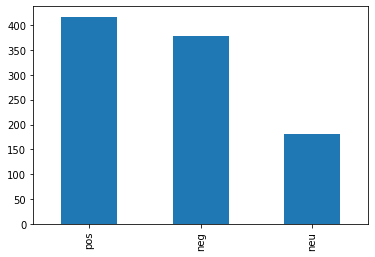

In [6]:
test['target'].value_counts().plot(kind='bar')

<h3> SVM(support Vector Machine) Model ::: </h3>

<p> S/N:: Logistic regression implemtation may need one-hot-encoded target variables because y variable contains >2 multiclass labels
 Different parameters from default will need to be applied due to multiclass label
</p>


In [7]:
from sklearn import svm
from sklearn import model_selection           #for implementing cross validation

svc = svm.SVC(kernel='linear', C=1, probability=True)     # Initiate SVM model

kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=7)   # 10 K-fold Cross validation

cv_results = model_selection.cross_val_score(svc, X_train, y_train, cv=kfold, scoring='accuracy')  # results

print(f"SVM Model Accuracy: Mean:{cv_results.mean()}   S.D: {cv_results.std()}")

## training the model
#prediction = svc.predict_proba(xvalid_bow) 
#prediction_int = prediction[:,1] >= 0.3 
#prediction_int = prediction_int.astype(np.int) 
#f1_score(yvalid, prediction_int)

SVM Model Accuracy: Mean:0.6576055312954876   S.D: 0.031538489457216906


<h3> Random Forest Classifier ::: </h3>

S/N: Micro- and macro-averages (for whatever metric) will compute slightly different things, and thus their interpretation differs. A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes).

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=400, random_state=11)

rf_results = model_selection.cross_val_score(rf, X_train, y_train, cv=kfold, scoring='accuracy') 

print(f"Random Forrest Model Accuracy: Mean:{rf_results.mean()}   S.D: {rf_results.std()}")

Random Forrest Model Accuracy: Mean:0.9943001608825558   S.D: 0.003948010973404544


<h3> MultiLayer Perceptron (MLP) ::: </h3>


In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

#Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data  
scaler = StandardScaler()  
scaler.fit(X_train)  
# Transform X train data
X_train = scaler.transform(X_train)  
# Transform X test data
X_test = scaler.transform(X_test)  

mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(2,3), max_iter=2000, activation='logistic')

mlp_results = model_selection.cross_val_score(mlp, X_train, y_train, cv=kfold, scoring='accuracy')

print(f"Multlayer Perceptron Model Accuracy: Mean: {mlp_results.mean()}  S.D: {mlp_results.std()}")

C:\Users\malik\miniconda3\envs\tensor2.5\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\malik\miniconda3\envs\tensor2.5\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\malik\miniconda3\envs\tensor2.5\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs faile

Multlayer Perceptron Model Accuracy: Mean: 0.7295602543476596  S.D: 0.13301088995562096


In [10]:
# Implementing Grid Search to explore the hyperparameters on MLP

from sklearn.model_selection import GridSearchCV

param_grid = [
        {
            'activation' : ['identity', 'logistic'],
            'solver' : ['lbfgs', 'adam'],
            'hidden_layer_sizes': [
             (1,2),(2,3),(3,),(4,),(5,),(10,),(12,4),(16,2),(17,),(18,),(20,)
             ],
            'max_iter' : [2000]
        }
       ]

clf = GridSearchCV(MLPClassifier(), param_grid, cv=3,
                           scoring='accuracy')
clf.fit(X_train,y_train)


print("Best parameters set found on development set:")
print(clf.best_params_)


C:\Users\malik\miniconda3\envs\tensor2.5\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Best parameters set found on development set:
{'activation': 'logistic', 'hidden_layer_sizes': (3,), 'max_iter': 2000, 'solver': 'adam'}


In [11]:
#clf.cv_results_ 
bestModel = clf.best_estimator_
print(bestModel)
print(clf.best_score_)
print(clf.best_params_)

MLPClassifier(activation='logistic', hidden_layer_sizes=(3,), max_iter=2000)
1.0
{'activation': 'logistic', 'hidden_layer_sizes': (3,), 'max_iter': 2000, 'solver': 'adam'}


In [12]:
mlp2 = MLPClassifier(solver='adam', hidden_layer_sizes=(12, 4), max_iter=2000, activation='logistic').fit(X_train,y_train)
y_pred = mlp2.predict(X_test)


<h3> Evaluation Metrics for 'final selected model'</h3>

In [13]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report


print(f"Model F1 Score is: {f1_score(y_test, y_pred, average='macro')}")
print(f"Model Accuracy is: {accuracy_score(y_test, y_pred)}")
print(f"Model Precision is: {metrics.precision_score(y_test, y_pred, average='micro')}")
print(f"Model Recall is: {metrics.recall_score(y_test, y_pred, average='macro')}")
print(end='\n')

# Return Sturctured Classification Report
print(classification_report(y_test, y_pred))





Model F1 Score is: 1.0
Model Accuracy is: 1.0
Model Precision is: 1.0
Model Recall is: 1.0

              precision    recall  f1-score   support

         neg       1.00      1.00      1.00       379
         neu       1.00      1.00      1.00       182
         pos       1.00      1.00      1.00       417

    accuracy                           1.00       978
   macro avg       1.00      1.00      1.00       978
weighted avg       1.00      1.00      1.00       978



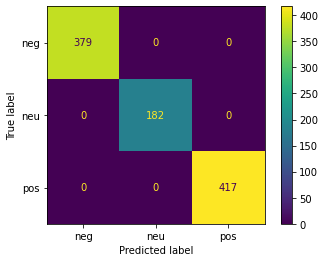

In [14]:
# Generate a confusion Matrix plot
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=mlp2.classes_) #can add normalise args (normalize='all'/'pred'/'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()


# Deployment:

In [15]:
## save model
import pickle
pickle.dump(mlp2, open("savedmodel.sav", 'wb'))

## some time later...
## load the model from disk
#rf2 = pickle.load(open("savedmodel.sav", 'rb'))
#pred = mlp2.predict(X_test)

Conclusion:

It can be observed that both Random Forest and Neural Network(MLP) models performs well compared to linear support vector machines.

# ...

# .....

# Limitations and other considerations

A lot has been considerd in this research but still there is plenty of room for other things to try out.

We have built so many models, we can definitely try model ensembling.

Take out Parts-of-Speech tagging and try creating with new features with stemming or without any stem/lemma.

Use bi-grams or tri-grams (tokens of 2 or 3 words respectively) for Bag-of-Words and TF-IDF then build models using these features

We can give pretrained word-embeddings models a try as the embedding learned from the data is not very accurate and doesn't perform well without the additional features

<p>Others: Try implementing LTSM Neural Network using logic demonstated <a href:"https://www.kaggle.com/kritanjalijain/twitter-sentiment-analysis-lstm"> on this Kaggle Notebook </a></p>